In [9]:
import numpy as np
from scipy import signal
from scipy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython.display as display
import math

# Sine Wave (Pure Tone)

A sine wave is defined by their frequency `f`, the amplitude `A` and an optional phase $\phi$ parameter.

## Global Parameters

In [10]:
# Sample Rate (Hz)
sr = 44100 
# length of the Generated Signal (s)
length = 2
# Signal Frequency (Hz)
freq = 220
# Signal Amplitude (-1, 1)
Amp = 1
# Phase (radians)
theta = math.radians(0)
# Period (s)
period = 1/freq

## Generate Sine Signal

In [11]:
# x Axis (time)
x = np.linspace(0, length, sr * length, endpoint=False)
# y Axis (Amplitude)
signal = Amp*np.sin(2*np.pi*freq*x+theta)

The term `2*π*freq` is also known as the angular frequency ω.

## Fast Fourier Transform

In [12]:
yf = rfft(signal)
xf = rfftfreq(sr*length, 1 / sr)

## Plot Time domain & Frequency domain

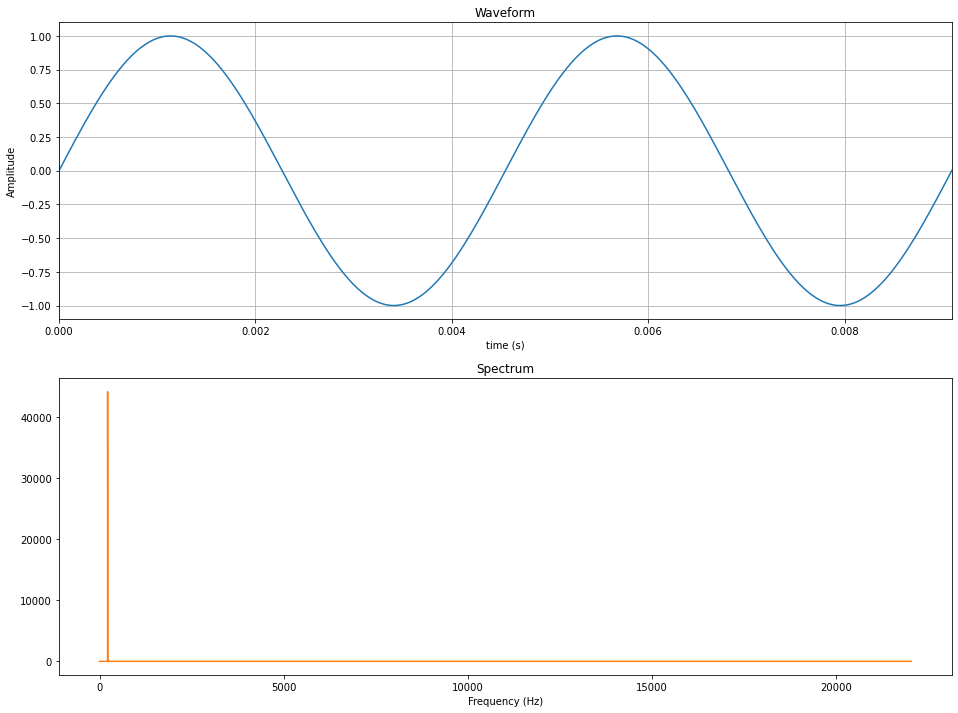

In [13]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
axes[0].plot(x, signal, label="Sine", color='C0')
axes[0].set_title('Waveform')
axes[0].set_xlabel('time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)
axes[0].set_xlim(0, period*2)
axes[1].plot(xf, np.abs(yf), label="Sine", color='C1')
axes[1].set_title('Spectrum')
axes[1].set_xlabel('Frequency (Hz)')
plt.show()

## Read and Write `.wav`

After generated our sine, we export our signal to 16bit `.wav` file using `scipy.wavfile`.

In [14]:
wavfile.write("sine.wav", sr, np.int16((signal / signal.max()) * 32767))

In [15]:
samplerate, data = wavfile.read('./mysinewave.wav')

In [16]:
print(f'Data container: {type(data)}')
print(f'Data shape: {data.shape}')
print(f'Sampling rate: {samplerate}')
print(f'Bit depth: {data.dtype}')
print(f'Audio length: {data.size/samplerate} seconds')

Data container: <class 'numpy.ndarray'>
Data shape: (88200,)
Sampling rate: 44100
Bit depth: int16
Audio length: 2.0 seconds


In [17]:
sine = display.Audio("./sine.wav")
sine